# PreProcessing of Dataset

### Importing important Libraries and Modules

In [1]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
ds = pd.read_csv('nyc_taxi_trip_duration.csv')
ds.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
# Checking Dataset Structure
print('We have {} rows'.format(ds.shape[0]),'and {} columns'.format(ds.shape[1]))

# Checking Missing Data
ny.sum(pd.isnull(ds))

We have 729322 rows and 11 columns


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

The Dataset doesn't contain any missing values.

In [4]:
# Converting strings to datetime features
ds['pickup_datetime'] = pd.to_datetime(ds.pickup_datetime)
ds['dropoff_datetime'] = pd.to_datetime(ds.dropoff_datetime)

# Converting yes/no flag to 1 and 0 (Yes = 1 and No = 0)
ds['store_and_fwd_flag'] = 1 * (ds.store_and_fwd_flag.values == 'Y')

# Checking consistency
ds['check_trip_duration'] = (ds['dropoff_datetime'] - ds['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = ds[ny.abs(ds['check_trip_duration'].values  - ds['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

There is no inconsistency in data wrt the drop location and trip duration

In [5]:
# Let us delete unnecessary columns 
ds = ds.drop(['check_trip_duration'],axis=1)
ds.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      0
trip_duration                        1100
Name: 1, dtype: object

## Adding Some Important Columns which might be useful

In [6]:
# Calculating the distance between Drop and Pickup locations by using the distance furmula
ds['Distance_Travelled(in_Km)'] = (((ds['dropoff_latitude']-ds['pickup_latitude'])**2 + (ds['dropoff_longitude']-ds['pickup_longitude'])**2)**(1/2))*100
#Calculating the Avg Speed of Taxi
ds['AvgSpeed(in_Km/hrs)'] = (ds['Distance_Travelled(in_Km)'])/(ds['trip_duration']/3600)

# Extracting Day of Week, Hour of Day & Month of Year of our trips.
ds['day_of_week'] = ds['pickup_datetime'].dt.weekday # 0 is sunday and 6 is Saturday
ds['hour_of_day'] = ds['pickup_datetime'].dt.hour # 0 is 12 am 
ds['month_of_year'] = ds['pickup_datetime'].dt.month
ds.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance_Travelled(in_Km),AvgSpeed(in_Km/hrs),day_of_week,hour_of_day,month_of_year
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,1.259228,11.333053,0,16,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,3.737077,12.230432,4,23,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,7.271163,16.009901,6,17,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2.147267,6.774902,1,9,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,4.326431,18.366924,2,6,2


***

# EDA

## Creating a outlier free dataset
We are creating a copy of original dataset and we will updating this copy of dataset throughout EDA by removing outliers

In [7]:
dsn = ds.copy()

## Target Exploration

In [8]:
ds['trip_duration'].describe()/60  # Trip duration in mins

count    12155.366667
mean        15.870486
std         64.410437
min          0.016667
25%          6.616667
50%         11.050000
75%         17.916667
max      32328.933333
Name: trip_duration, dtype: float64

In [9]:
ds['trip_duration'].describe()/3600  # Trip duration in hrs

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Text(0, 0.5, 'trip duration')

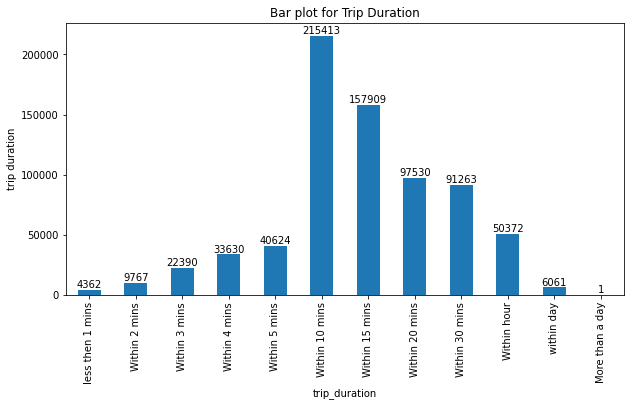

In [10]:
# Categorization the trip duration into different categories.
pt.figure(figsize=[10,5])
labels=['less then 1 mins','Within 2 mins','Within 3 mins','Within 4 mins','Within 5 mins','Within 10 mins','Within 15 mins','Within 20 mins','Within 30 mins','Within hour','within day','More than a day']
ax = ds.groupby(pd.cut(ds['trip_duration'],bins=[0,60,120,180,240,300,600,900,1200,1800,3600,86400,10000000],labels=labels))['trip_duration'].count().plot(kind='bar')
ax.bar_label(ax.containers[0])
pt.title('Bar plot for Trip Duration')
pt.ylabel('trip counts')
pt.ylabel('trip duration')

Observations
- There is only one ride which is more than a day long.
- The maximum number of rides are about 5 to 30 mins which shows that these taxies are mainly use for short distances.
- We can Neglect rides which are less then 2 mins and longer than hour, as these can be consider as outliers.

In [11]:
# Removing Some Outliers and updating in copy of dataset
dsn = dsn.loc[(dsn.trip_duration > 120) & (dsn.trip_duration < 3600)]

Text(0, 0.5, 'trip duration')

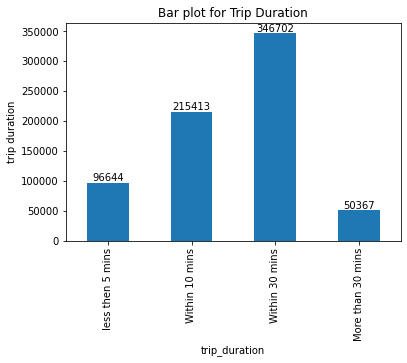

In [12]:
labels=['less then 5 mins','Within 10 mins','Within 30 mins','More than 30 mins']
ax = dsn.groupby(pd.cut(ds['trip_duration'],bins=[0,300,600,1800,3600],labels=labels))['trip_duration'].count().plot(kind='bar')
ax.bar_label(ax.containers[0])
pt.title('Bar plot for Trip Duration')
pt.ylabel('trip counts')
pt.ylabel('trip duration')

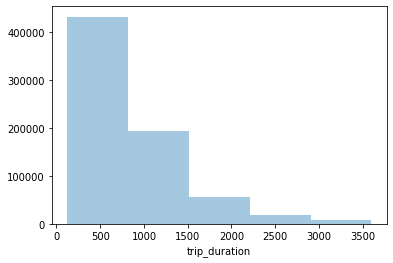

In [13]:
sb.distplot(dsn['trip_duration'], kde = False, bins = 5)
pt.show()

We can see that we couldn't visualise it properly so we will use log tansform

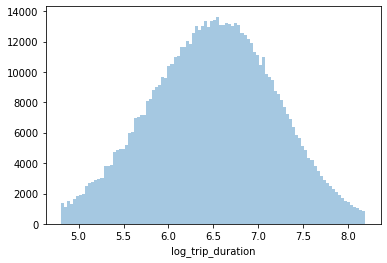

In [14]:
dsn['log_trip_duration'] = ny.log(dsn['trip_duration'].values + 1)
sb.distplot(dsn['log_trip_duration'], kde = False, bins = 100)
pt.show()

It follows normal distribution as we have already remove some outliers, so the sides are trimmed

## Univariate Analysis

### Day of Week 

Text(0, 0.5, 'Total Number of pickups')

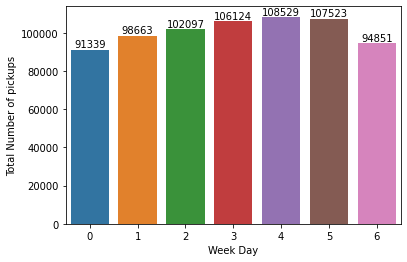

In [15]:
ax = sb.countplot(dsn['day_of_week'])
ax.bar_label(ax.containers[0])
pt.xlabel('Week Day')
pt.ylabel('Total Number of pickups')

It can be seen as expected that rides at weekends (0 = sunday & 6 = Saturday) are less than usual

### Hour of the Day

Text(0, 0.5, 'Total number of pickups')

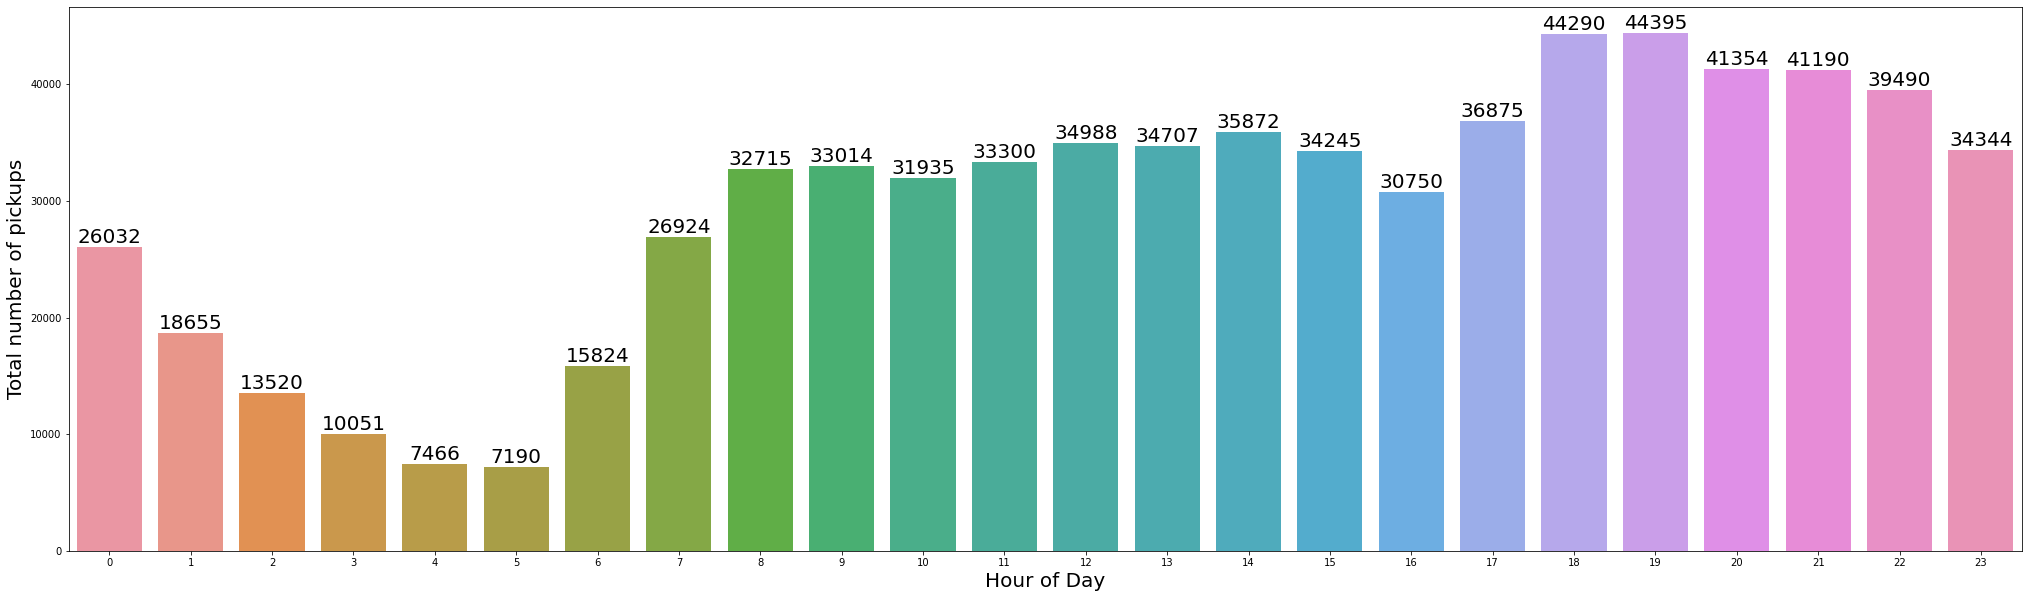

In [16]:
pt.figure(figsize=(35, 10))
ax = sb.countplot(dsn['hour_of_day'])
ax.bar_label(ax.containers[0],fontsize =20)
pt.xlabel('Hour of Day',fontsize =20)
pt.ylabel('Total number of pickups',fontsize =20)

Here, it is seen that the demand is peaked after 6pm till midnight and then gradually start decresing till 5am in the morning.

### Month of Year

Text(0, 0.5, 'Total number of pickups')

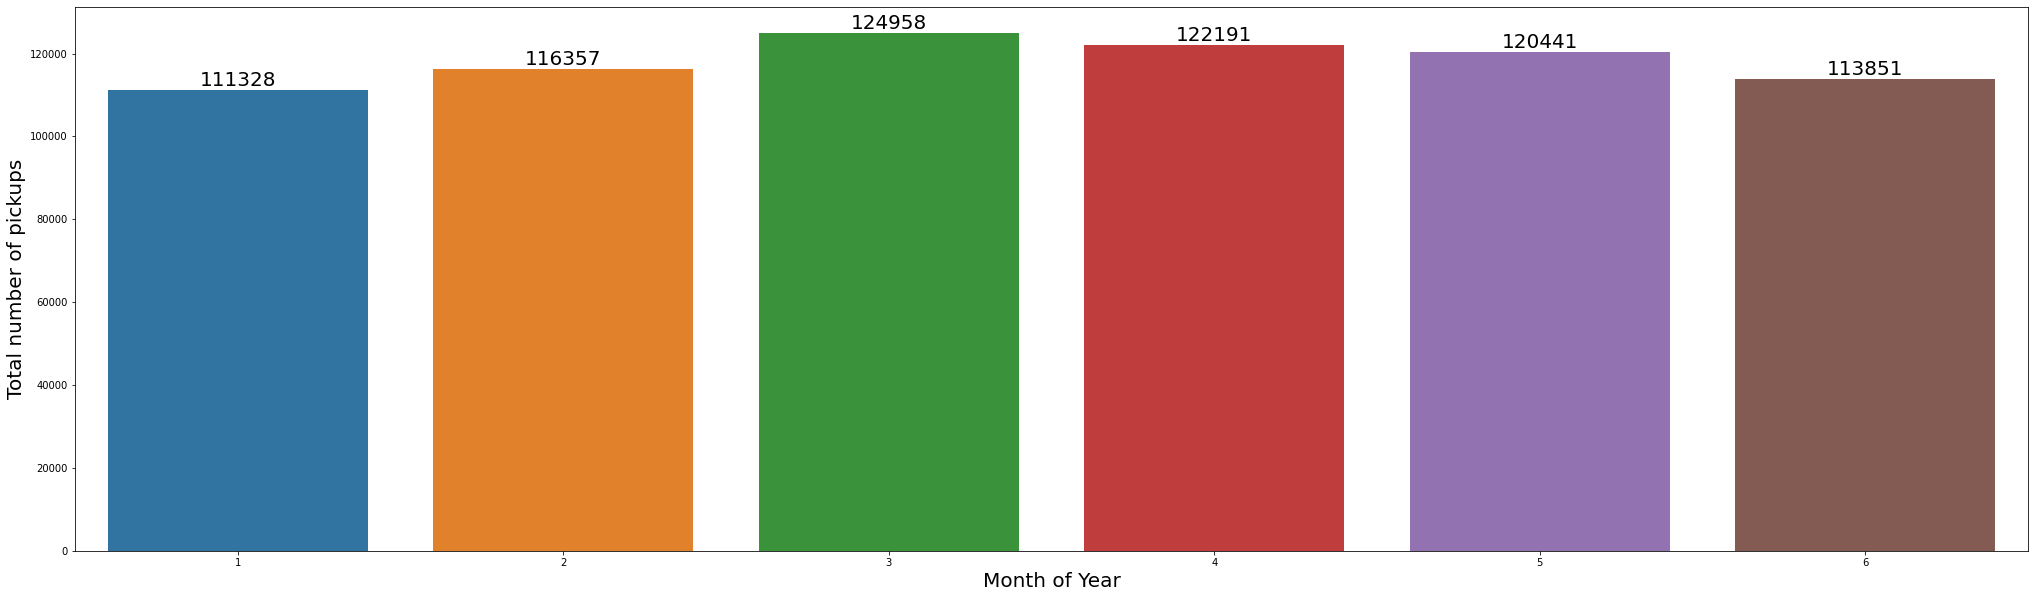

In [17]:
pt.figure(figsize=(35, 10))
ax = sb.countplot(dsn['month_of_year'])
ax.bar_label(ax.containers[0],fontsize =20)
pt.xlabel('Month of Year',fontsize =20)
pt.ylabel('Total number of pickups',fontsize =20)

The variation between month of year is not so significant to measure something out of it.

### Pickup and Dropoff points

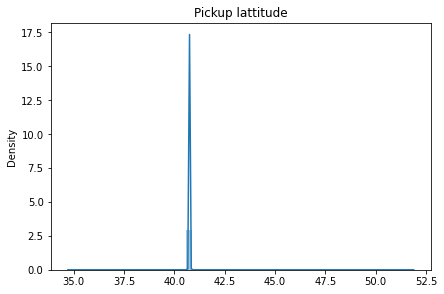

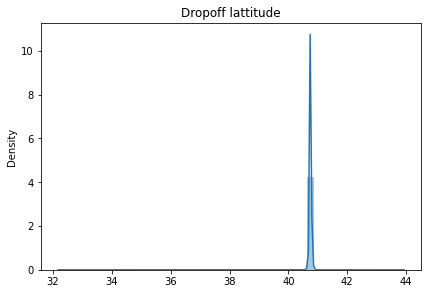

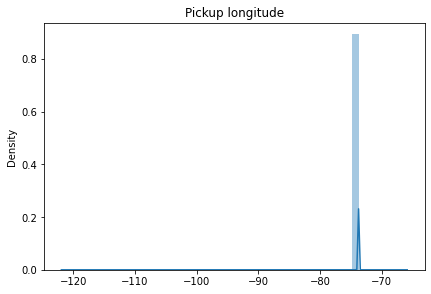

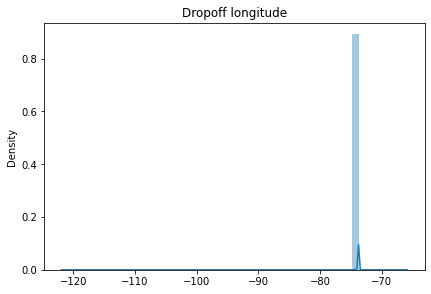

In [18]:
pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['pickup_latitude'].values)
pt.title('Pickup lattitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(222)
sb.distplot(dsn['dropoff_latitude'].values)
pt.title('Dropoff lattitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['pickup_longitude'].values)
pt.title('Pickup longitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['dropoff_longitude'].values)
pt.title('Dropoff longitude')
pt.show()

Here, we can again clearly see that there are few outliers that we need to neglect and update our new dataset accordingly.

In [19]:
dsn = ds.copy()
dsn = dsn.loc[(dsn.pickup_latitude > 40.65) & (dsn.pickup_latitude < 40.85)]
dsn = dsn.loc[(dsn.dropoff_latitude > 40.65) & (dsn.dropoff_latitude < 40.85)]
dsn = dsn.loc[(dsn.dropoff_longitude > -74.05) & (dsn.dropoff_longitude < -73.85)]
dsn = dsn.loc[(dsn.pickup_longitude > -74.05) & (dsn.pickup_longitude < -73.85)]

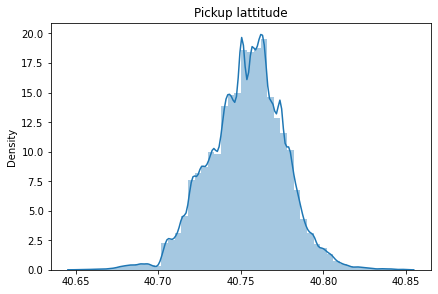

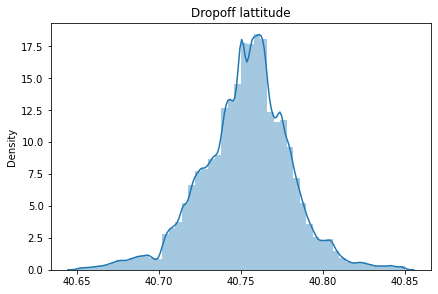

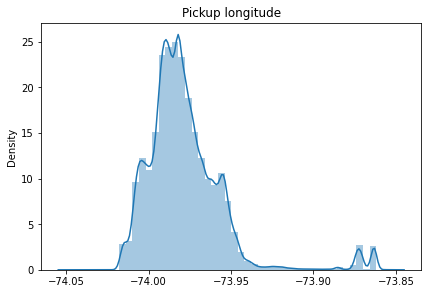

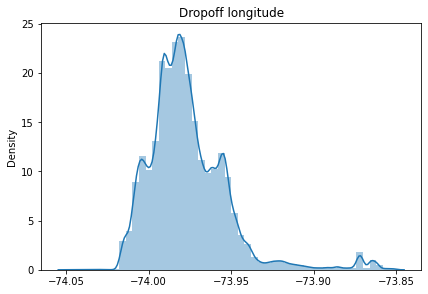

In [20]:
pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['pickup_latitude'].values)
pt.title('Pickup lattitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(222)
sb.distplot(dsn['dropoff_latitude'].values)
pt.title('Dropoff lattitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['pickup_longitude'].values)
pt.title('Pickup longitude')
pt.show()

pt.figure(figsize=(15, 10))
pt.subplot(221)
sb.distplot(dsn['dropoff_longitude'].values)
pt.title('Dropoff longitude')
pt.show()

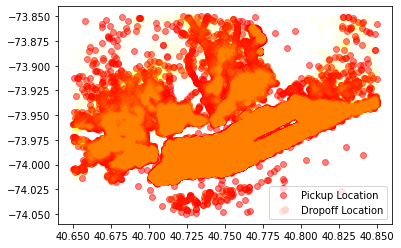

In [21]:
pt.scatter(dsn['pickup_latitude'].values, dsn['pickup_longitude'].values,color = 'red', alpha=0.5)
pt.scatter(dsn['dropoff_latitude'].values, dsn['dropoff_longitude'].values,color = 'yellow', alpha=0.009)
pt.legend(['Pickup Location','Dropoff Location'])
pt.show()

As we can clearly inference out that the maximum rides are limited to Latitudes between 40.65 to 40.85 and Longitude between -74.05 to -73.85 (The negative sign indicates West to mean longitude which is GMT line).

### Distance Travelled (in Km)

In [22]:
dsn['Distance_Travelled(in_Km)'].describe()  # Distance between pickup and drop locations in Km

count    694534.000000
mean          2.863111
std           2.566005
min           0.000000
25%           1.230725
50%           2.033547
75%           3.489340
max          19.993630
Name: Distance_Travelled(in_Km), dtype: float64

Text(0.5, 0, 'Distance Travelled (in Km)')

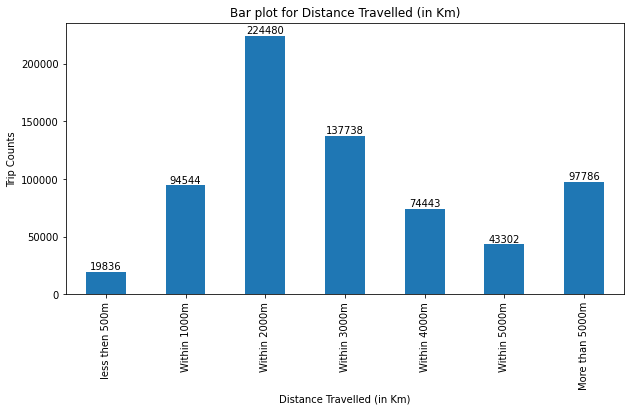

In [23]:
# Categorization the Distance Travelled (in Km) into different categories.
pt.figure(figsize=[10,5])
labels=['less then 500m','Within 1000m','Within 2000m','Within 3000m','Within 4000m','Within 5000m','More than 5000m']
ax = dsn.groupby(pd.cut(dsn['Distance_Travelled(in_Km)'],bins=[0,0.500,1,2,3,4,5,20],labels=labels))['Distance_Travelled(in_Km)'].count().plot(kind='bar')
ax.bar_label(ax.containers[0])
pt.title('Bar plot for Distance Travelled (in Km)')
pt.ylabel('Trip Counts')
pt.xlabel('Distance Travelled (in Km)')

People genrally use taxi ride  for 1Km to 4Km on average.

### Average Speed of Taxi

In [24]:
dsn['AvgSpeed(in_Km/hrs)'].describe()  # Avg Speed of Taxies

count    694534.000000
mean         13.886324
std           7.329738
min           0.000000
25%           9.127572
50%          12.620307
75%          17.167640
max        1090.138625
Name: AvgSpeed(in_Km/hrs), dtype: float64

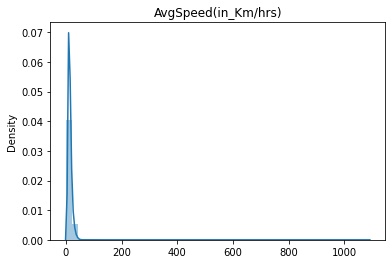

In [25]:
sb.distplot(dsn['AvgSpeed(in_Km/hrs)'].values)
pt.title('AvgSpeed(in_Km/hrs)')
pt.show()

Here it is clearly be seen that there are many outliers that we need to neglect. But first we need to check its distribution by  categorizating the Avg Speed

Text(0.5, 0, 'Avg Speed (in Km/hrs)')

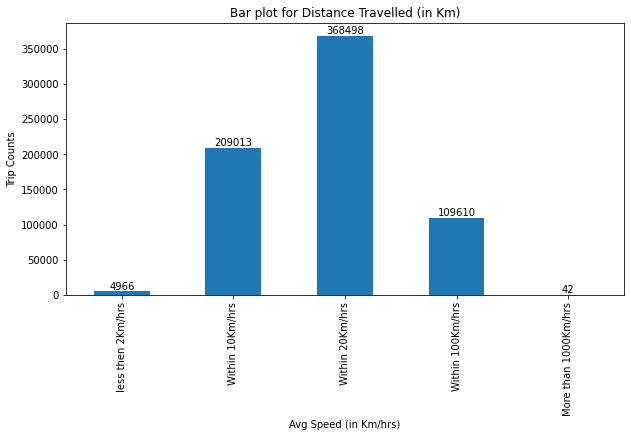

In [26]:
# Categorization the Avg Speed (in Km/hrs) into different categories.
pt.figure(figsize=[10,5])
labels=['less then 2Km/hrs','Within 10Km/hrs','Within 20Km/hrs','Within 100Km/hrs','More than 1000Km/hrs']
ax = dsn.groupby(pd.cut(dsn['AvgSpeed(in_Km/hrs)'],bins=[0,2,10,20,100,1100],labels=labels))['AvgSpeed(in_Km/hrs)'].count().plot(kind='bar')
ax.bar_label(ax.containers[0])
pt.title('Bar plot for Distance Travelled (in Km)')
pt.ylabel('Trip Counts')
pt.xlabel('Avg Speed (in Km/hrs)')

As the Avg Speed of a ride less than 2 km/hrs and greater than 100 Km/hrs doesn't make a sense so we'll consider them as outliers and omit them from our dataset

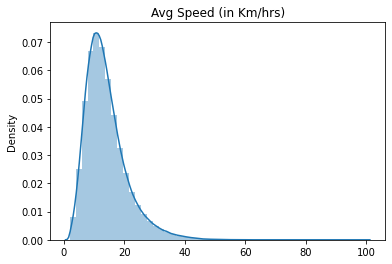

In [27]:
dsn = dsn[(dsn['AvgSpeed(in_Km/hrs)'] < 100) & (dsn['AvgSpeed(in_Km/hrs)'] > 2)]
# Plotting the distribution of Avg Speed (in_Km/hrs) of rides
sb.distplot(dsn['AvgSpeed(in_Km/hrs)'].values)
pt.title('Avg Speed (in Km/hrs)')
pt.show()

The distribution plot follows normal distribution leftward skewed.

### Passenger Count

Text(0, 0.5, 'Frequency')

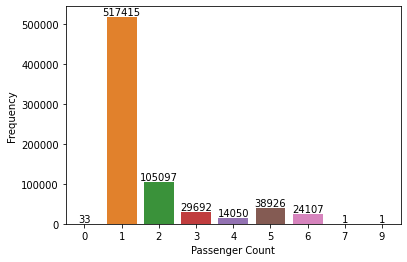

In [28]:
ax = sb.countplot(ds['passenger_count'])
ax.bar_label(ax.containers[0])
pt.xlabel('Passenger Count')
pt.ylabel('Frequency')

Let us see this on our new dataset

Text(0, 0.5, 'Frequency')

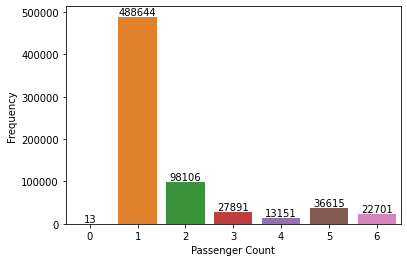

In [29]:
ax = sb.countplot(dsn['passenger_count'])
ax.bar_label(ax.containers[0])
pt.xlabel('Passenger Count')
pt.ylabel('Frequency')

 0 passenger count means some might book rides to transfer there goods. Carpool culture is not seen much as maximum number of use rides alone. 

### Vendor ID

Text(0, 0.5, 'Frequency')

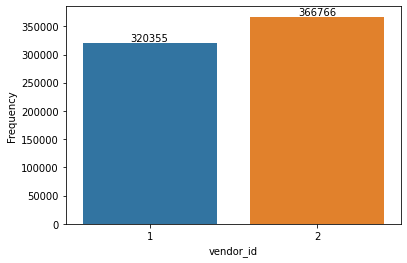

In [30]:
ax = sb.countplot(dsn['vendor_id'])
ax.bar_label(ax.containers[0])
pt.xlabel('vendor_id')
pt.ylabel('Frequency')

Vendor 2 has more number of trips than vendor 1

### Connection Failure

Text(0, 0.5, 'Frequency')

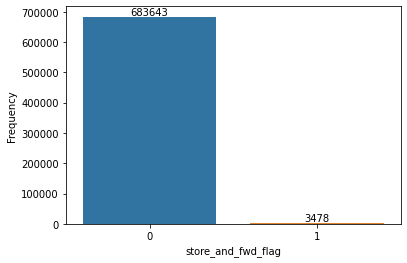

In [31]:
ax = sb.countplot(dsn['store_and_fwd_flag'])
ax.bar_label(ax.containers[0])
pt.xlabel('store_and_fwd_flag')
pt.ylabel('Frequency')

There is 0.01% chances that there would be connection error to server in the trips. This might have occured because of the following reasons:
- Outstation trips didn't had proper connection at the time when trip completes.
- Temporary loss of signals while the trip was about to finish
- Inconsistent signal reception over the trip duration.
- The GPS or mobile device battery was down when the trip finished.

## Multivariate Analysis

### Checking the Situation of traffic over the hour over the week

<AxesSubplot:xlabel='hour_of_day'>

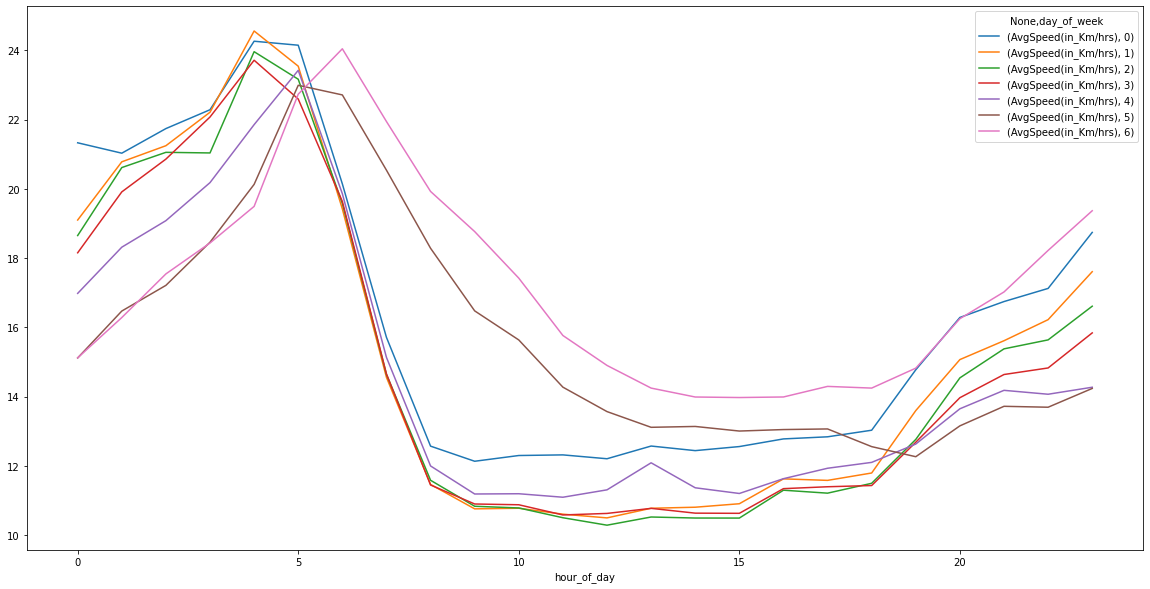

In [32]:
pivot = dsn.pivot_table(index = 'hour_of_day', columns='day_of_week', values = ['AvgSpeed(in_Km/hrs)'], aggfunc = 'mean')
pivot.plot(figsize=(20, 10))

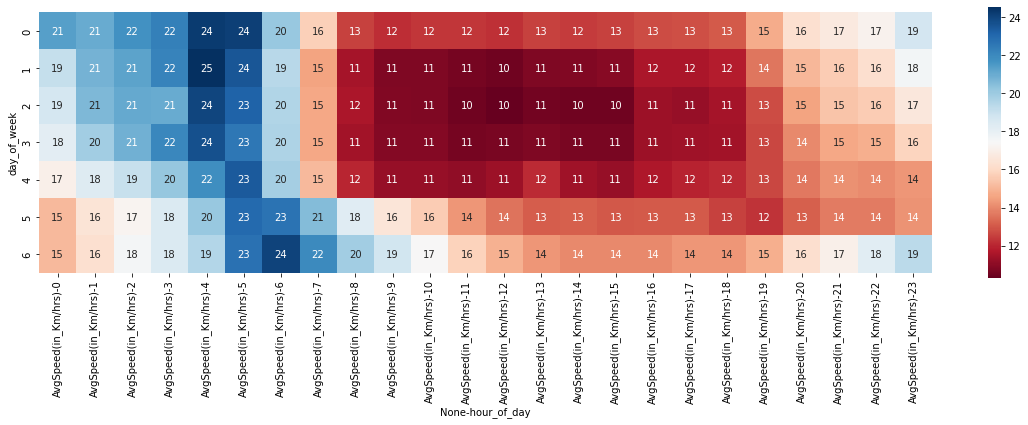

In [33]:
pivot = pd.pivot_table(data = dsn, index = 'day_of_week', columns='hour_of_day', values = ['AvgSpeed(in_Km/hrs)'], aggfunc = 'mean')
pt.figure(figsize=(20, 5))
ax = sb.heatmap(pivot, annot=True, cmap='RdBu', square=True)

Observations:
- We can clearly visualize the traffic condition over the week and to hour of the day.
- The higher the mean of average speed of taxies means lower the traffic, lower the mean of average speed of taxies means higher the traffic.
- People might likely to avoid taxies during 7am to 5pm because of heavy traffic during these time.
- People start using taxies after 6pm as traffic reduces afterwards.
- A similar trend is seen on thrusday as traffic is bit less so there is hike in taxi hiring.

## Correlation Heatmap
Let us quickly look at the correlation heatmap to check the correlations amongst all features.

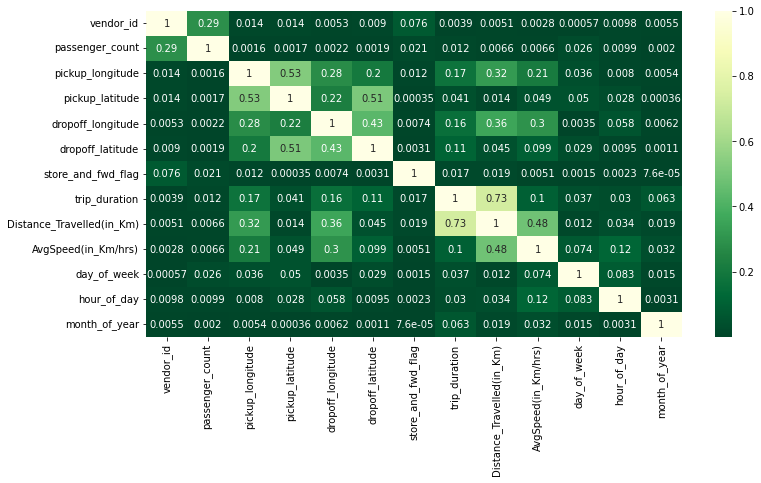

In [34]:
pt.figure(figsize=(12, 6))
df = dsn.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)
ax = sb.heatmap(abs(df.corr()), xticklabels=df.columns, yticklabels=df.columns, annot=True, cmap='YlGn_r')

Observations:
- We can clearly visualize the different correlation between different features.
- When noticing our target coulumn (Trip Duration), it depends largerly on the Distance travelled which is calculated by using next 3 closly related features such as pickup_longitude, dropoff_longitude and dropoff_latitude.
- The Average Speed is 4th most related to trip duration probably because of traffic during different time of the week.

***

# Different Predictive Models for predicting Duration of Trip

## Building Dataset for Machine Learning Models

In [35]:
dsn.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Distance_Travelled(in_Km)', 'AvgSpeed(in_Km/hrs)',
       'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

### Segregating variables: Independent and Dependent Variables

In [36]:
#seperating independent and dependent variables
x = dsn.drop(['id','pickup_datetime','dropoff_datetime','trip_duration'], axis=1)
y = dsn['trip_duration']
x.shape, y.shape

((687121, 12), (687121,))

### Splitting the Dataset into Train Set and the Test Set

In [37]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 50)

### Scaling the data (Using MinMax Scaler)

In [38]:
# Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Distance_Travelled(in_Km),AvgSpeed(in_Km/hrs),day_of_week,hour_of_day,month_of_year
0,1.0,0.166667,0.476756,0.644367,0.430295,0.605821,0.0,0.062946,0.095492,0.000000,0.695652,0.2
1,0.0,0.333333,0.303558,0.408683,0.275805,0.224651,0.0,0.186882,0.104674,0.666667,1.000000,0.4
2,1.0,0.333333,0.258222,0.357255,0.509582,0.624590,0.0,0.363650,0.143346,1.000000,0.739130,0.2
3,1.0,1.000000,0.437721,0.548586,0.465796,0.653143,0.0,0.107364,0.048852,0.166667,0.391304,0.0
4,0.0,0.166667,0.158483,0.292301,0.308673,0.453155,0.0,0.216361,0.167463,0.333333,0.260870,0.2


## Let us select a suitable Evaluation Metric for Machine Learning Models

The Most suitable Evaluation Metric that we are going to use is **R Squared** (Coefficient of Determination). We choose to this because:-
- It is Independent of Context.
- It tells the performance of your model, not the loss in an absolute sense
- The normal case is when the R2 score is between zero and one (but theoritically its nagative infintity to one), so it is easy to comapre all models.
- The only disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases, and here there is no addtion of features here so we are good to go with this metrics.

In [39]:
from sklearn.metrics import r2_score as r2

## 1) Benchmark Model

In [40]:
# Calculating R Squared Error of Training Data
simple_train = ny.empty(len(train_y)) + train_y.mean() # We need to create an empty array of lenth equal to array of train_y
simple_train_error = r2(simple_train , train_y)
print('Train R Squared Error ', simple_train_error)

# Calculating R Squared Error of Testing Data
simple_test = ny.empty(len(test_y)) + train_y.mean() # We need to create an empty array of lenth equal to array of test_y
simple_test_error = r2(simple_test , test_y)
print('Test R Squared Error', simple_test_error)

Train R Squared Error  -6.147913661640893e+29
Test R Squared Error -2.440794986902087e+30


The Main Reason for this Negative value is because <u>Model is not learning</u> the trend that is present in the train data. We are just preforming comparison with the mean of data. 
###### This also means error is huge.

## 2) KNN Regressor Model

In [41]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set
train_predict = reg.predict(train_x)
k_train_error = r2(train_predict, train_y)
print('Train R Squared Error', k_train_error )

# Predicting over the Test Set
test_predict = reg.predict(test_x)
k_test_error = r2(test_predict, test_y)
print('Test R Squared Error', k_test_error )

Train R Squared Error 0.9763307352928909
Test R Squared Error 0.9617083974993975


### Elbow for Classifier

Text(0.5, 1.0, 'Elbow Curve for test')

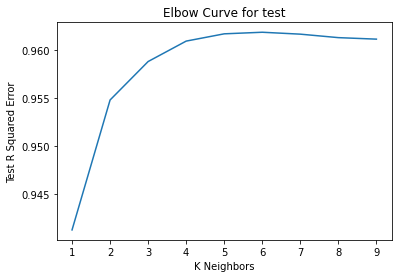

In [42]:
def Elbow(K):
    #initiating empty list
    test_r2 = []
  
    # training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending r2 value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = r2(tmp,test_y)
        test_r2.append(tmp)
    
    return test_r2

# Defining K range
k = range(1,10)

# Calling above defined function
test = Elbow(k)

# Plotting the Curves
pt.plot(k, test)
pt.xlabel('K Neighbors')
pt.ylabel('Test R Squared Error')
pt.title('Elbow Curve for test')

The Elbow curve here is inverted because of our choice of metric evolution. The higher the R2 score is the better the model it is considered.

In [43]:
# Creating instance of KNN
reg = KNN(n_neighbors = 4)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set
train_predict = reg.predict(train_x)
k_train_error = r2(train_predict, train_y)
print('Train R Squared Error', k_train_error)

# Predicting over the Test Set
test_predict = reg.predict(test_x)
k_test_error = r2(test_predict, test_y)
print('Test R Squared Error', k_test_error)

Train R Squared Error 0.9783027695350144
Test R Squared Error 0.9609503379109386


The Value of R Squared Error is quite high which clearly indicates that this model is **good for our predictions**.

## 3) Linear Regression Model

In [44]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression as LR

# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
LR_train_error = r2(train_predict, train_y)
print('Training R Squared Error', LR_train_error )

# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
LR_test_error = r2(test_predict, test_y)
print('Test R Squared Error', LR_test_error )

Training R Squared Error 0.764357924035828
Test R Squared Error 0.7603614553340933


### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

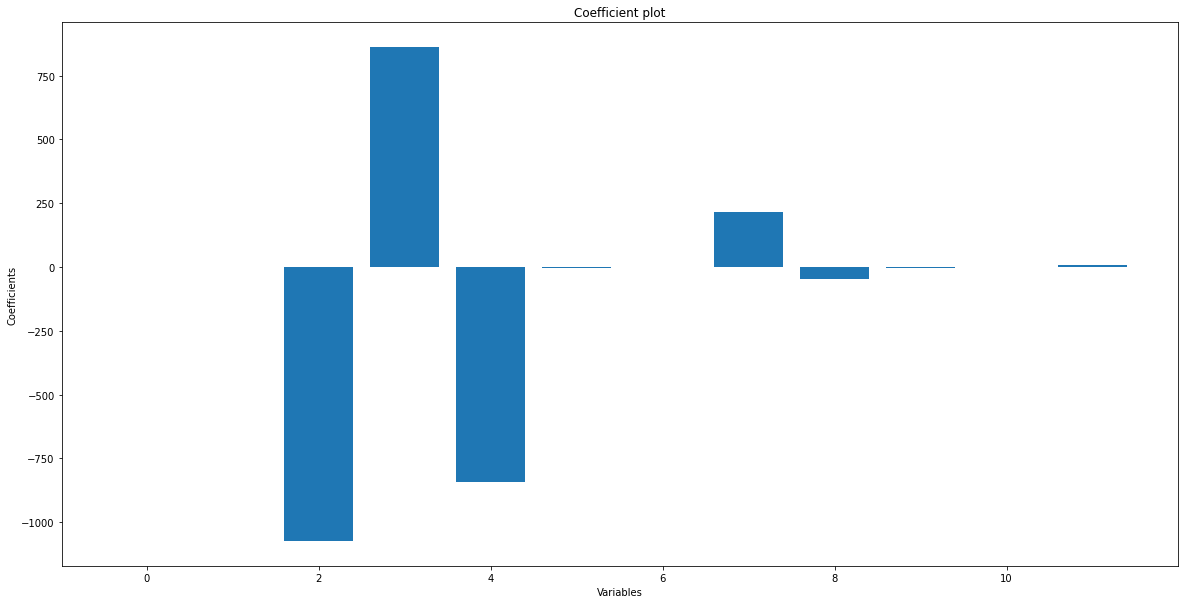

In [45]:
pt.figure(figsize=(20, 10))
x = range(len(train_x.columns))
y = lr.coef_
pt.bar(x,y)
pt.xlabel('Variables')
pt.ylabel('Coefficients')
pt.title('Coefficient plot')

In [46]:
train_x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Distance_Travelled(in_Km),AvgSpeed(in_Km/hrs),day_of_week,hour_of_day,month_of_year
699944,1,1,-73.997345,40.740974,-73.984718,40.727299,0,1.861335,10.199095,1,21,2
251482,1,1,-74.002403,40.729446,-73.959961,40.776279,0,6.320351,24.361097,6,22,1
492778,2,2,-73.955521,40.804291,-73.980972,40.733742,0,7.499967,21.879968,6,21,3
632728,1,1,-73.983788,40.768139,-73.980148,40.745983,0,2.245265,10.091081,2,20,1
524079,2,6,-73.992958,40.719822,-73.993683,40.721123,0,0.148911,5.105505,4,22,4


Observations:
- As the coefficients we are normalised and we can easily make final inferences out of it.
- Here we can see that there are a lot of Coefficients which are near to zero and not significant.
- Let us apply Rigid and Lasso Regularisation to tune our features.

## 3.1) Linear Regression with Ridge Regularisation

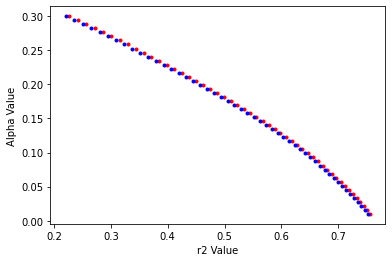

In [47]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

#Iterate through various values of alpha to find the lowest r2
for i in ny.linspace(0.01,0.3,50): 
    ridgereg = Ridge(alpha=i, normalize=True) # Creating instance of Linear Regresssion with Normalised Data
    ridgereg.fit(train_x, train_y) #Fit the model

    # Predicting over the Train Set and calculating error
    train_predict = ridgereg.predict(train_x)
    LRR_train_error = r2(train_predict, train_y)

    # Predicting over the Test Set and calculating error
    test_predict = ridgereg.predict(test_x)
    LRR_test_error = r2(test_predict, test_y)
    
    pt.plot(LRR_train_error, i, color = 'Red', marker = '.')
    pt.plot(LRR_test_error, i, color = 'Blue', marker = '.')
    pt.ylabel('Alpha Value')
    pt.xlabel('r2 Value')
pt.show()

So after applying Ridge Regularisation as lowest value is find at alpha = 0.25 approx as train and test are showing right values.

In [48]:
# Creating instance of Linear Regresssion with Normalised Data
ridgereg = Ridge(alpha=0.25, normalize=True) # Creating instance of Linear Regresssion with Normalised Data
ridgereg.fit(train_x, train_y) #Fit the model

# Predicting over the Train Set and calculating error
train_predict = ridgereg.predict(train_x)
LRR_train_error = r2(train_predict, train_y)
print('Training R Squared Error', LRR_train_error )

# Predicting over the Test Set and calculating error
test_predict = ridgereg.predict(test_x)
LRR_test_error = r2(test_predict, test_y)
print('Testing R Squared Error', LRR_test_error )

Training R Squared Error 0.35003067537438615
Testing R Squared Error 0.3444330629367396


Text(0.5, 1.0, 'Coefficient plot')

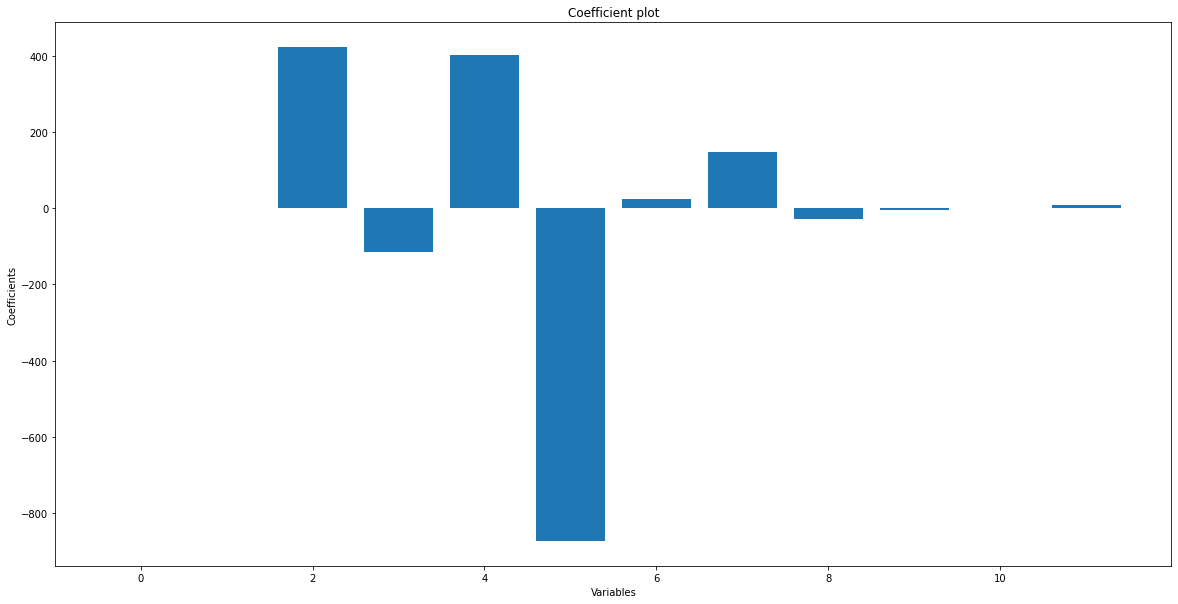

In [49]:
pt.figure(figsize=(20, 10))
x = range(len(train_x.columns))
y = ridgereg.coef_
pt.bar(x,y)
pt.xlabel( 'Variables')
pt.ylabel('Coefficients')
pt.title('Coefficient plot')

## 3.2) Linear Regression with Lasso Regularisation

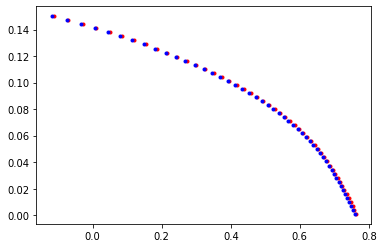

In [50]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Lasso

# Iterate through various values of alpha to find the lowest r2
for i in ny.linspace(1e-03,0.15,50): 
    lassoreg = Lasso(alpha=i, normalize=True) # Creating instance of Linear Regresssion with Normalised Data
    lassoreg.fit(train_x, train_y) #Fit the model

    # Predicting over the Train Set and calculating error
    train_predict = lassoreg.predict(train_x)
    LRL_train_error = r2(train_predict, train_y)

    # Predicting over the Test Set and calculating error
    test_predict = lassoreg.predict(test_x)
    LRL_test_error = r2(test_predict, test_y)
    
    pt.plot(LRL_train_error, i, color = 'Red', marker = '.')
    pt.plot(LRL_test_error, i, color = 'Blue', marker = '.')
pt.show()

So after applying Ridge Regularisation as lowest value is find at alpha = 0.11 approx as train and test are showing right values.

In [51]:
# Creating instance of Linear Regresssion with Normalised Data
lassoreg = Lasso(alpha=0.11, normalize=True) # Creating instance of Linear Regresssion with Normalised Data
lassoreg.fit(train_x, train_y) #Fit the model

# Predicting over the Train Set and calculating error
train_predict = lassoreg.predict(train_x)
LRL_train_error = r2(train_predict, train_y)
print('Training R Squared Error', LRL_train_error )

# Predicting over the Test Set and calculating error
test_predict = lassoreg.predict(test_x)
LRL_test_error = r2(test_predict, test_y)
print('Testing R Squared Error', LRL_test_error )

Training R Squared Error 0.3298590472123706
Testing R Squared Error 0.3250032907165036


Text(0.5, 1.0, 'Coefficient plot')

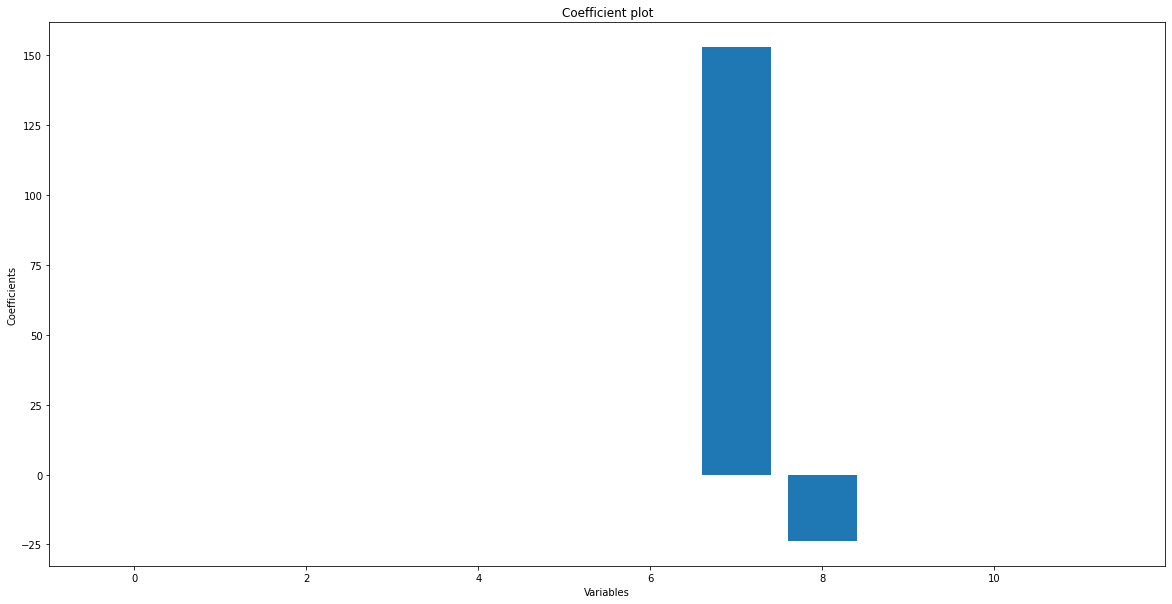

In [52]:
pt.figure(figsize=(20, 10))
x = range(len(train_x.columns))
y = lassoreg.coef_
pt.bar(x,y)
pt.xlabel( 'Variables')
pt.ylabel('Coefficients')
pt.title('Coefficient plot')

#### Let us compare the variable coefficients of Linear Model with regularisation:-
- In Simple Linear Model various coefficients are taken care of while predicting the model
    - Pickup Longitude and Latitude as well as DropOff Longitude are the main driving factors for predicting the Trip Durations.
    - The Negative coefficient is there because of (-)ve sign in dataset which represent western hemishere.
    - The Distance and Avg Speed are next two important factors for predicting the Trip Durations.
    - As we all know that Time Taken is directly proportional to Distance & Time Taken is inversly proportional to Avg Speed (negative nature).
    - The Distance calculated here is not exact distance taken by taxies as we don't know the routes taken by them so we took out displacement Pickup and DropOff point in attempt to find the distances.
    - The Avg Speed is also not best creteria for prediction mainly due to it's dependency traffic and it's the variable taken out of distance which itself is not accurate to predict the Trip Durations.
- In Linear Model with Ridge Regularisation various coefficients are taken care of while predicting the model
    - Pickup Longitude and Latitude as well as DropOff Longitude and Latitude are the main driving factors for predicting the Trip Durations.
    - One Extra variable coefficient that is store_and_fwd_flag	is here also used but that's significatly reduce our overall score of our model.
- In Linear Model with Lasso Regularisation very few coefficients are taken care of while predicting the model
    - The Distance and Avg Speed are only the main driving factors for predicting the Trip Durations.
    - Lasso Regularisation if offten dubbed as feature picker which it really does well according to our intution, which is Avg Speed and the distance but nethier our distance is exact nor our Avg Speed (it also depends on traffic which is why it's bit less than distance), So our model prediction is improved because few extra coefficients are not considered.

## 4) Decision Tree model

In [53]:
# Importing the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=50)

# Fitting the model
dtr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = dtr.predict(train_x)
DT_train_error = r2(train_predict, train_y)
print('Training R Squared Error', DT_train_error )

# Predicting over the Test Set and calculating error
test_predict = dtr.predict(test_x)
DT_test_error = r2(test_predict, test_y)
print('Testing R Squared Error', DT_test_error )

Training R Squared Error 1.0
Testing R Squared Error 0.9992107863771513


In [54]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 50,
 'splitter': 'best'}

In [55]:
from sklearn.model_selection import GridSearchCV

# Maximum depth of trees
max_depth = [19,20,21,22]

# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]

# HYperparameter Grid
param_dt = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Grid search
dt_grid = GridSearchCV(estimator=dtr, param_grid = param_dt)

dt_grid.fit(train_x,train_y)

print(dt_grid.best_score_)
print(dt_grid.best_estimator_)

0.9991126495809635
DecisionTreeRegressor(max_depth=21, min_samples_leaf=3, random_state=50)


In [56]:
dtr = DecisionTreeRegressor(max_depth = 21, min_samples_leaf = 3, min_samples_split = 2, random_state = 50)

# Fitting the model
dtr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = dtr.predict(train_x)
DT_train_error = r2(train_predict, train_y)
print('Training R Squared Error', DT_train_error )

# Predicting over the Test Set and calculating error
test_predict = dtr.predict(test_x)
DT_test_error = r2(test_predict, test_y)
print('Testing R Squared Error', DT_test_error )

Training R Squared Error 0.9997988026737434
Testing R Squared Error 0.999219131714026


###  Checking Variable Importance

In [57]:
imp_dict = {'Feature' : list(train_x.columns), 'Feature Importance' : dtr.feature_importances_}

imp_dsn = pd.DataFrame(imp_dict)

imp_dsn.sort_values(by=['Feature Importance'], ascending=False, inplace=True)
imp_dsn

,Feature,Feature Importance
7,Distance_Travelled(in_Km),6.495627e-01
8,AvgSpeed(in_Km/hrs),3.503246e-01
2,pickup_longitude,3.858673e-05
4,dropoff_longitude,3.696572e-05
10,hour_of_day,1.681322e-05
11,month_of_year,6.416369e-06
3,pickup_latitude,4.830290e-06
5,dropoff_latitude,4.069500e-06
9,day_of_week,3.260544e-06
0,vendor_id,1.139770e-06


#### Observations:
- Here we can easily see the importance of all features for predicting the Trip Durations.
- Distance Travelled and Avg Speed are one of the most important features to prediction.
- We can understand Pickup & DropOff Corrdinates are also essential part beacuse it helps us to find distance travelled.
- Hour of the day is also an important factor which is beacuse it describes the traffic pattern over the day which impacts the overall sellection of rides.
- Month of Year, Day of Week, Vendor ID & Passenger Count are not much of the important factors.
- While store_and_fwd_flag is the least important factors to predict the Trip Duration.

***

# Model Comparison

In [58]:
Testing_r2 = [k_train_error, LR_train_error, LRR_train_error, LRL_train_error, DT_train_error]
errors = [k_test_error, LR_test_error, LRR_test_error, LRL_test_error, DT_test_error]
comp = pd.DataFrame({'Train_Score': Testing_r2, 'Test_Score': errors})

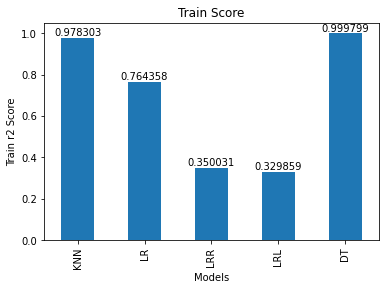

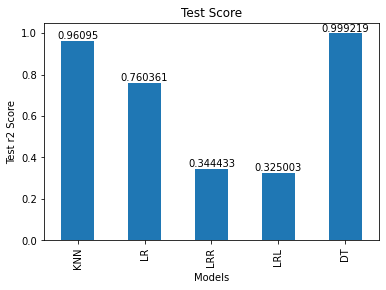

In [59]:
label = ['KNN', 'LR', 'LRR', 'LRL', 'DT']
ax = comp['Train_Score'].plot(kind='bar', title='Train Score')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Train r2 Score')
ax.set_xlabel('Models')
ax.set_xticklabels(label)
pt.show()
ax1 = comp['Test_Score'].plot(kind='bar',title='Test Score')
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel('Test r2 Score')
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
pt.show()

### Observations:
- We have skipped the benchmark model which is in negative so any postive model score means that any model is better than our benchmark model.
- Decision Tree Model is the best Model to predict the trip durations beause it helps us to categories the features and then make predictions accordingly.
- KNN Model is the next best model to predict the Trip Duration.
- Simple Linear Regression is good way as it gives more importance Coordinates of PickUp and DropOff loctions than Distance & Avg Speed and along with Hour of Day which is also helps us in predicting traffic as well.
- Linear Model with Ridge Regularisation is worest model for predicting the Trip Duration beacuse it even use some extra features and in this case the least important feature for predictions.
- Linear Model with Lasso Regularisation is better than Linear Model with Ridge Regularisation beacuse it eleminates the other non usefull features and only uses the 2 most imporatant featues but the values of features are itself not exact or accruate that is distance (Displacement here in this case) and the Avg Speed. It also not taken account the traffic into consideration hence it is not even better than prediction made by Simple Linear Regression Model.

***

# Made By Piyush Mishra